In [1]:
import tensorflow as tf
from tensorflow.keras import datasets,layers,models
import matplotlib.pyplot as plt

In [18]:
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import MaxPooling2D
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Flatten
from tensorflow.keras.optimizers import SGD, Adam
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.layers import Dropout
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt

In [3]:
(trainX, trainY), (testX, testY) = tf.keras.datasets.cifar10.load_data()


170508288/170498071 [==============================] - 6s 0us/step


In [4]:
# convert from integers to floats
#train_norm = trainX.astype('float32')
#test_norm = testX.astype('float32')
# normalize to range 0-1
trainX = trainX / 255.0
testX = testX / 255.0

In [7]:
trainX.shape

(50000, 32, 32, 3)

In [8]:
testX.shape

(10000, 32, 32, 3)

In [ ]:
dir(trainX)

In [11]:
class_names=["airplane","automobile","bird","cad","deer","dog","frog","horse","ship","truck"]


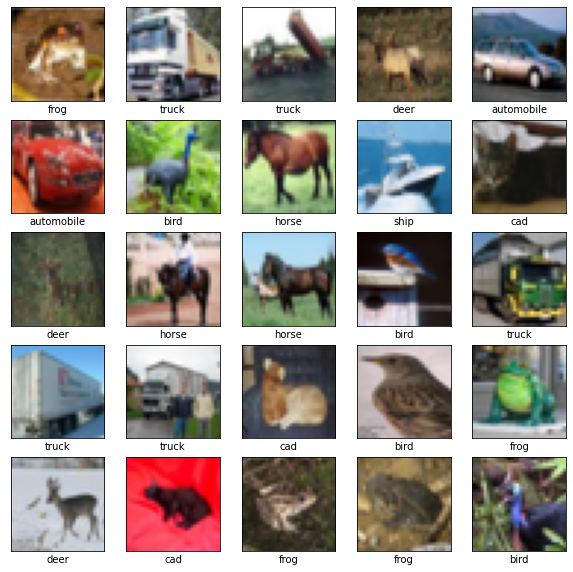

In [12]:
plt.figure(figsize=(10,10))
for i in range(25):
  plt.subplot(5,5,i+1)
  plt.xticks([])
  plt.yticks([])
  plt.grid(False)
  plt.imshow(trainX[i])
  plt.xlabel(class_names[trainY[i][0]])
plt.show()  

In [21]:
model=Sequential()
model.add(layers.Conv2D(32,(3,3),activation='relu',input_shape=(32,32,3)))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(64,(3,3),activation="relu"))
model.add(layers.MaxPooling2D(2,2))
model.add(layers.Conv2D(64,(3,3),activation="relu"))

In [22]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 30, 30, 32)        896       
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 15, 15, 32)       0         
 2D)                                                             
                                                                 
 conv2d_7 (Conv2D)           (None, 13, 13, 64)        18496     
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 6, 6, 64)         0         
 2D)                                                             
                                                                 
 conv2d_8 (Conv2D)           (None, 4, 4, 64)          36928     
                                                                 
Total params: 56,320
Trainable params: 56,320
Non-trai

In [23]:
model.add(layers.Flatten())
model.add(layers.Dense(64,activation='relu'))
model.add(Dense(10))

In [24]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 30, 30, 32)        896       
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 15, 15, 32)       0         
 2D)                                                             
                                                                 
 conv2d_7 (Conv2D)           (None, 13, 13, 64)        18496     
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 6, 6, 64)         0         
 2D)                                                             
                                                                 
 conv2d_8 (Conv2D)           (None, 4, 4, 64)          36928     
                                                                 
 flatten (Flatten)           (None, 1024)             

In [26]:
model.compile(optimizer='adam',loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),metrics=['accuracy'])
history=model.fit(trainX,trainY,epochs=10,validation_data=(testX,testY))

Epoch 1/10
1563/1563 [==============================] - 73s 46ms/step - loss: 1.5049 - accuracy: 0.4506 - val_loss: 1.3015 - val_accuracy: 0.5334
Epoch 2/10
1563/1563 [==============================] - 70s 45ms/step - loss: 1.1258 - accuracy: 0.6017 - val_loss: 1.0409 - val_accuracy: 0.6354
Epoch 3/10
1563/1563 [==============================] - 70s 45ms/step - loss: 0.9787 - accuracy: 0.6547 - val_loss: 0.9470 - val_accuracy: 0.6703
Epoch 4/10
1563/1563 [==============================] - 70s 45ms/step - loss: 0.8743 - accuracy: 0.6929 - val_loss: 0.9155 - val_accuracy: 0.6809
Epoch 5/10
1563/1563 [==============================] - 70s 45ms/step - loss: 0.8050 - accuracy: 0.7170 - val_loss: 0.9348 - val_accuracy: 0.6789
Epoch 6/10
1563/1563 [==============================] - 70s 45ms/step - loss: 0.7453 - accuracy: 0.7387 - val_loss: 0.8586 - val_accuracy: 0.7034
Epoch 7/10
1563/1563 [==============================] - 71s 45ms/step - loss: 0.6938 - accuracy: 0.7594 - val_loss: 0.9446 -

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: MatplotlibDeprecationWarning: Unrecognized location 'lower_right'. Falling back on 'best'; valid locations are
	best
	upper right
	upper left
	lower left
	lower right
	right
	center left
	center right
	lower center
	upper center
	center
This will raise an exception in 3.3.
  


313/313 - 4s - loss: 0.8631 - accuracy: 0.7194 - 4s/epoch - 13ms/step


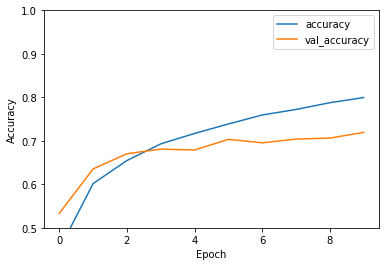

In [27]:
plt.plot(history.history['accuracy'],label='accuracy')
plt.plot(history.history['val_accuracy'],label='val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5,1])
plt.legend(loc='lower_right')

test_loss,test_acc=model.evaluate(testX,testY,verbose=2)

In [28]:
print(test_acc)

0.7193999886512756
